<a href="https://colab.research.google.com/github/Vardhannn/ML/blob/main/Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimension Reduction
#### a. Load a dataset and Implement Bayes Classification model
#### b. Apply Dimension Reduction using :        
        1. Principal Component Analysis
        2. Linear Discriminant Analysis
#### c. Apply the model to data with reduced dimensions
#### d. compare and contrast model performance in each case

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTsTahZpKiB1lFKXlRTTyS5HvZu8t3Q6pZtUSqsYTzhVxRZ5H3aqIlYR4mpBngQKDKv4FWRmwGKuaoq/pub?output=csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
print(data.shape)

(200, 6)


In [ ]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# Standardizing the string columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])

In [ ]:
#separate features and class labels into separate varaibles
x = data.drop("Drug",axis=1)
y = data['Drug']

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Fitting the Naive Bayes classifier to the training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = gnb.predict(X_test)

In [ ]:
# Computing the accuracy of the model
acc_orig = accuracy_score(y_test, y_pred)
print("Original Accuracy : ",acc_orig)

Original Accuracy :  0.925


In [ ]:
org_report = classification_report(y_test, y_pred)
print(org_report) 

              precision    recall  f1-score   support

       drugA       0.86      1.00      0.92         6
       drugB       0.75      1.00      0.86         3
       drugC       0.83      1.00      0.91         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      0.80      0.89        15

    accuracy                           0.93        40
   macro avg       0.89      0.96      0.92        40
weighted avg       0.94      0.93      0.92        40



### Apply PCA 

In [ ]:
# Applying PCA to reduce dimensionality of the dataset
pca = PCA(n_components = 1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Fitting the Naive Bayes classifier to the training set with reduced dimensions
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

# Predicting the target variable for the test set with reduced dimensions
y_pred_pca = gnb_pca.predict(X_test_pca)

# Computing the accuracy of the model with PCA
acc_pca = accuracy_score(y_test, y_pred_pca)
print("PCA Accuracy : ",acc_pca)

PCA Accuracy :  0.375


In [ ]:
pca_report = classification_report(y_test, y_pred_pca)
print(pca_report) 

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         5
       drugX       0.00      0.00      0.00        11
       drugY       0.38      1.00      0.55        15

    accuracy                           0.38        40
   macro avg       0.07      0.20      0.11        40
weighted avg       0.14      0.38      0.20        40



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy of the original model: {:.2f}%".format(acc_orig * 100))
print("Accuracy of the PCA model: {:.2f}%".format(acc_pca * 100))

Accuracy of the original model: 92.50%
Accuracy of the PCA model: 37.50%


# Further deatiks on PCA to check principal components and other details

In [ ]:
print(pca)
print(pca.components_)


PCA(n_components=1)
[[-0.99970497 -0.00271867 -0.00149124  0.00268004  0.02394118]]


In [ ]:
# Determine explained variance using explained_variance_ratio_ attribute
exp_var_pca = pca.explained_variance_ratio_
print(exp_var_pca)

[0.82844175]


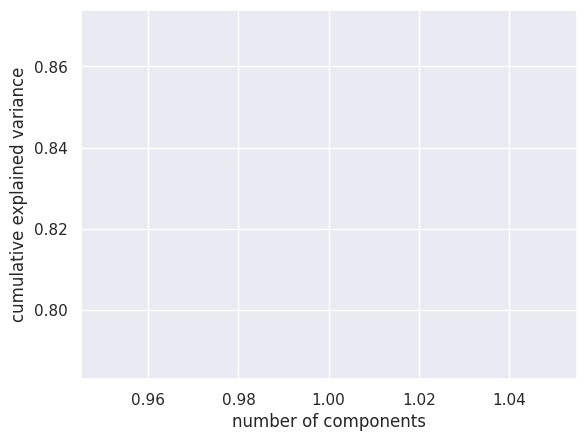

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
x = range(1,len(exp_var_pca)+1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#Apply LDA

In [ ]:
# Applying LDA to reduce the dimensionality of the dataset
lda = LDA(n_components = 4)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Fitting the Naive Bayes classifier to the training set with reduced dimensions using LDA
gnb_lda = GaussianNB()
gnb_lda.fit(X_train_lda, y_train)

# Predicting the target variable for the test set with reduced dimensions using LDA
y_pred_lda = gnb_lda.predict(X_test_lda)

# Computing the accuracy of the model with LDA
acc_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Accuracy : ",acc_lda)

LDA Accuracy :  0.95


In [ ]:
lda_report = classification_report(y_test, y_pred_lda)
print(lda_report) 

              precision    recall  f1-score   support

       drugA       0.80      0.67      0.73         6
       drugB       0.50      0.67      0.57         3
       drugC       0.67      0.80      0.73         5
       drugX       0.90      0.82      0.86        11
       drugY       1.00      1.00      1.00        15

    accuracy                           0.85        40
   macro avg       0.77      0.79      0.78        40
weighted avg       0.86      0.85      0.85        40



In [ ]:
print("Accuracy of the original model: {:.2f}%".format(acc_orig * 100))
print("Accuracy of the PCA model: {:.2f}%".format(acc_pca * 100))
print("Accuracy of the LDA model: {:.2f}%".format(acc_lda * 100))

Accuracy of the original model: 92.50%
Accuracy of the PCA model: 87.50%
Accuracy of the LDA model: 85.00%


In [ ]:
digits = pd.read_csv("/content/digits.csv")
digits

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(digits.shape)

(42000, 785)


In [ ]:
url = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTxWfzkXfmXGOjc0_ImLe-pXlRFOVOzrDTNXRD24gQcKQJ12_xJkBx2CydSwdiuktyC07t9XXgV92e8/pub?output=csv")
url

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12061,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12062,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12063,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn import datasets
dataset = datasets.load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

AttributeError: ignored